<a href="https://colab.research.google.com/github/akhila-attem/Airline-data/blob/main/Airline_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#Importing the data
path="/content/test_val.xlsx"
data=pd.read_excel(path)
data

BadZipFile: ignored

In [ ]:
# delete the column 'Locations'
del data['id']
data

In [ ]:
#Checking for Null values
data.isna().sum();
len(data)

NameError: ignored

In [ ]:
data.info();

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique());

In [ ]:
data['Gender'] = data.Gender.map({'Male':0, 'Female':1})
data.head()

In [ ]:
data['Customer_Type'] = data.Customer_Type.map({'Loyal Customer':1,'disloyal Customer':0})
data['Type_of_Travel'] = data.Type_of_Travel.map({'Business travel':1,'Personal Travel':0})
data['Class'] = data.Class.map({'Eco':-1,'Business':0,'Eco Plus':1})
data.head()
data['satisfaction'] = data.satisfaction.map({'satisfied':1,'neutral or dissatisfied':0})
data.head()
#Flight_Distance
#Cleaning the columns that have null values
data['Arrival_Delay_in_Minutes']=data["Arrival_Delay_in_Minutes"].fillna(np.mean(data["Arrival_Delay_in_Minutes"]))
data.head()

NameError: ignored

In [ ]:
#Checking for Null values
data.isna().sum();

In [ ]:
data.info();

#Dealing with Outliers

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

NameError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
import numpy as np
from scipy import stats
standard_deviations = 3
data[((data['Customer_Type'] - data['Customer_Type'].mean()) / data['Customer_Type'].std()).abs() < standard_deviations];
data[((data['Flight_Distance'] - data['Flight_Distance'].mean()) / data['Flight_Distance'].std()).abs() < standard_deviations];
data[((data['Checkin_service'] - data['Checkin_service'].mean()) / data['Checkin_service'].std()).abs() < standard_deviations];
data[((data['Departure_Delay_in_Minutes'] - data['Departure_Delay_in_Minutes'].mean()) / data['Departure_Delay_in_Minutes'].std()).abs() < standard_deviations];
data[((data['Arrival_Delay_in_Minutes'] - data['Arrival_Delay_in_Minutes'].mean()) / data['Arrival_Delay_in_Minutes'].std()).abs() < standard_deviations];

In [ ]:
Flight_Distance1 = []
for value in data['Flight_Distance']:
    if value < 500:
        Flight_Distance1.append("V_S_H")
    elif value > 500 and value < 1500:
        Flight_Distance1.append("S_H_F")
    elif value > 1500 and value < 4000:
        Flight_Distance1.append("M_H_F")
    else:
      Flight_Distance1.append("L_H_F")
      

In [ ]:
Flight_Distance1=pd.DataFrame({'Flight_Distance1':Flight_Distance1})
Flight_Distance1

,Flight_Distance1
0,V_S_H
1,M_H_F
2,V_S_H
3,M_H_F
4,S_H_F
...,...
129875,V_S_H
129876,M_H_F
129877,M_H_F
129878,S_H_F


In [ ]:
data = data.assign(Flight_Distance1=Flight_Distance1)
data

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Flight_Distance1
0,1,1,52,1,-1,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,1,V_S_H
1,1,1,36,1,0,2863,1,1,3,1,...,4,4,4,3,4,5,0,0.0,1,M_H_F
2,0,0,20,1,-1,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,0,V_S_H
3,0,1,44,1,0,3377,0,0,0,2,...,1,1,1,3,1,4,0,6.0,1,M_H_F
4,1,1,49,1,-1,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,1,S_H_F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,23,1,-1,192,2,1,2,3,...,3,1,4,2,3,2,3,0.0,0,V_S_H
129876,0,1,49,1,0,2347,4,4,4,4,...,5,5,5,5,5,4,0,0.0,1,M_H_F
129877,0,0,30,1,0,1995,1,1,1,3,...,3,2,4,5,5,4,7,14.0,0,M_H_F
129878,1,0,22,1,-1,1000,1,1,1,5,...,4,5,1,5,4,1,0,0.0,0,S_H_F


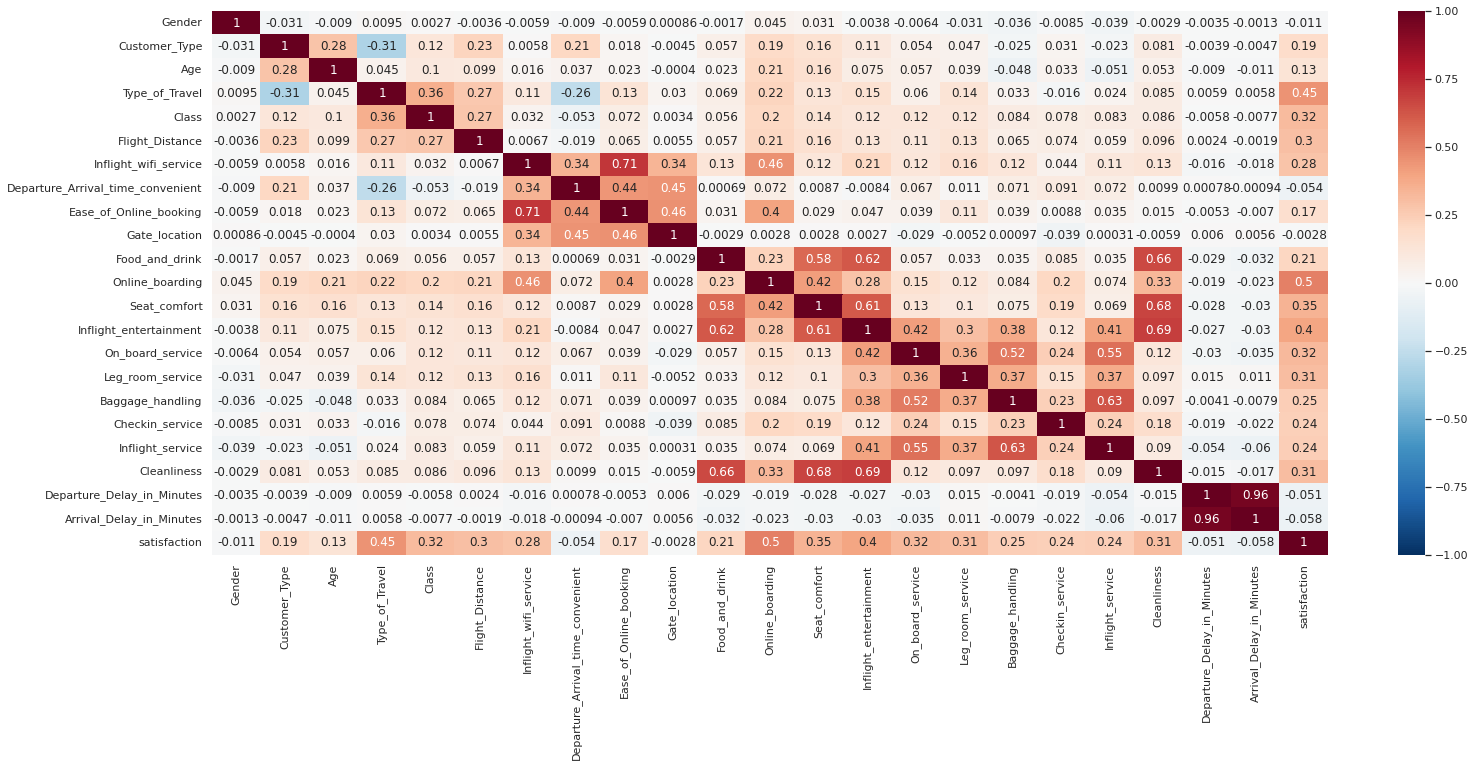

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(25,10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

#EDA

In [ ]:
l=pd.DataFrame(data, columns=['Inflight_wifi_service','Departure_Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On_board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness'])
l

,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,2,1,2,3,2,2,2,2,3,1,4,2,3,2
129876,4,4,4,4,2,4,5,5,5,5,5,5,5,4
129877,1,1,1,3,4,1,5,4,3,2,4,5,5,4
129878,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(data.columns[:-1]):
  plot = sns.distplot(data[c] ,ax=axes[i])
plt.tight_layout()

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Error in callback <function flush_figures at 0x000001EF839719D0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='Flight_Distance1'>

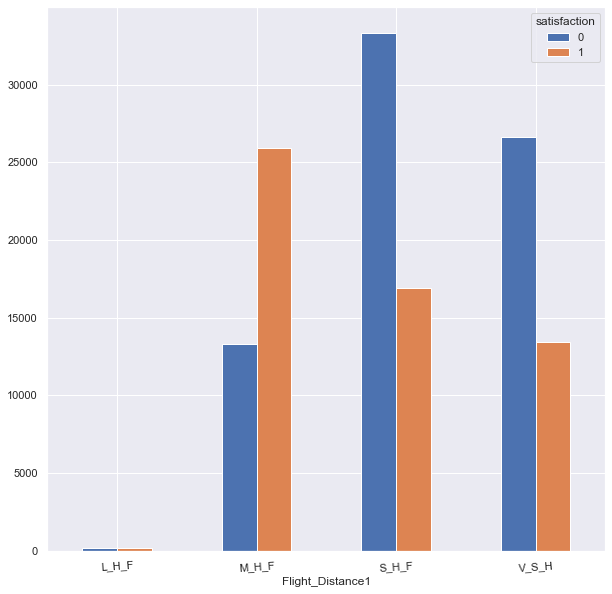

In [ ]:
CrosstabResult=pd.crosstab(index=data['Flight_Distance1'],columns=data['satisfaction'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4) 

Text(0.5, 1.0, 'Flight_Distance1 vs satisfaction')

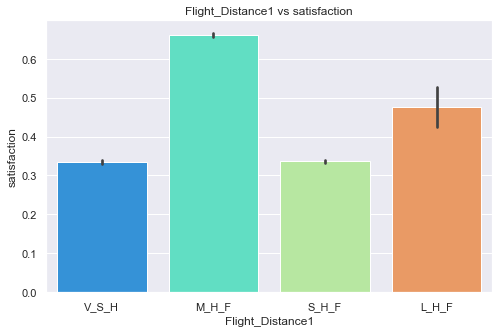

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Flight_Distance1',y='satisfaction',data=data, palette='rainbow')
plt.title("Flight_Distance1 vs satisfaction")

satisfaction       0      1
Customer_Type              
0              18080   5700
1              55372  50728


<AxesSubplot:xlabel='Customer_Type'>

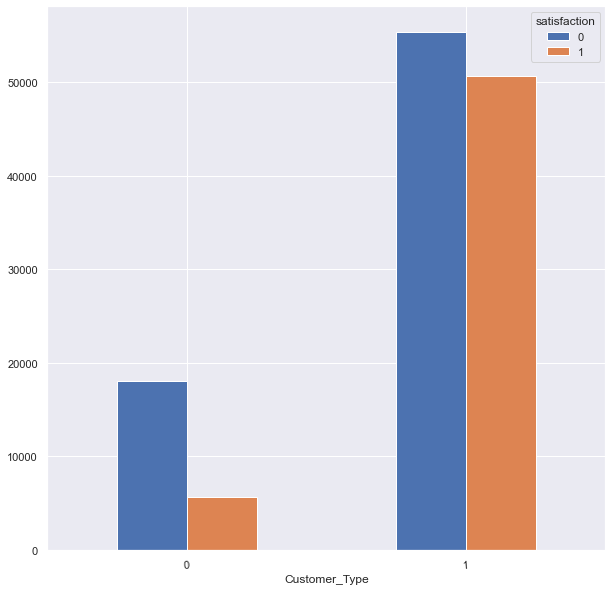

In [ ]:
CrosstabResult=pd.crosstab(index=data['Customer_Type'],columns=data['satisfaction'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(10,10), rot=4) 

Text(0.5, 1.0, 'Customer_Type vs satisfaction')

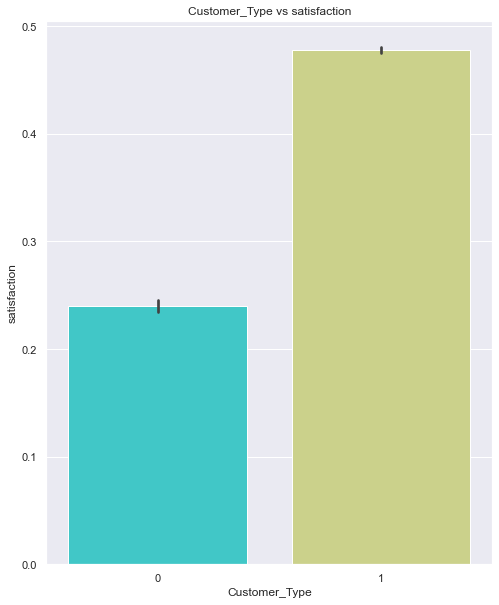

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(x='Customer_Type',y='satisfaction',data=data, palette='rainbow')
plt.title("Customer_Type vs satisfaction")

<AxesSubplot:xlabel='Type_of_Travel'>

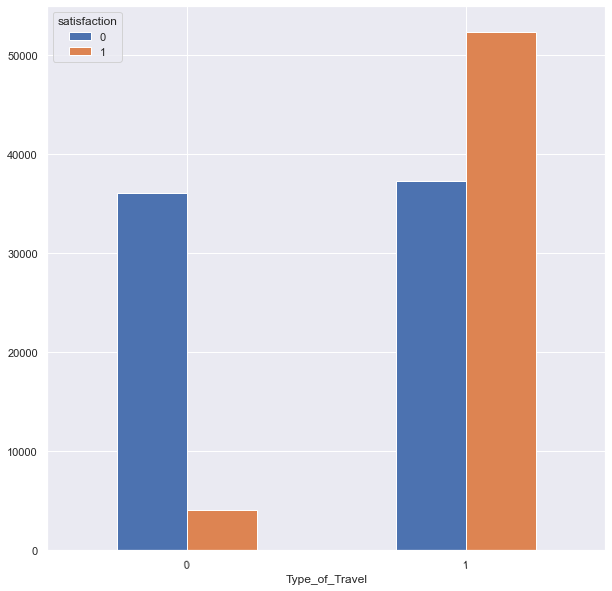

In [ ]:
CrosstabResult=pd.crosstab(index=data['Type_of_Travel'],columns=data['satisfaction'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4)

Text(0.5, 1.0, 'Type_of_Travel vs satisfaction')

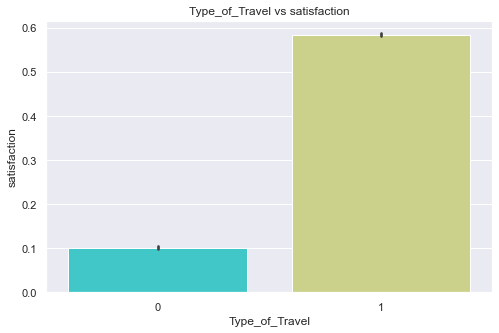

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Type_of_Travel',y='satisfaction',data=data, palette='rainbow')
plt.title("Type_of_Travel vs satisfaction")

Text(0.5, 1.0, 'Customer_Type vs satisfaction')

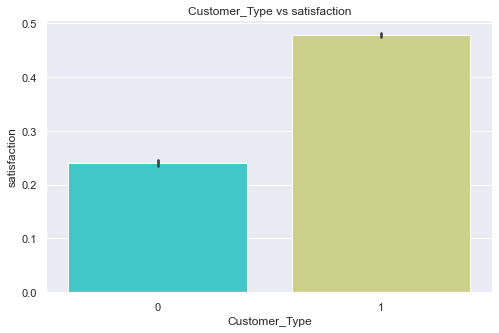

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Type',y='satisfaction',data=data, palette='rainbow')
plt.title("Customer_Type vs satisfaction")

In [ ]:
df=pd.DataFrame(data,columns=['Inflight_wifi_service','Departure_Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On_board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness'])

<AxesSubplot:>

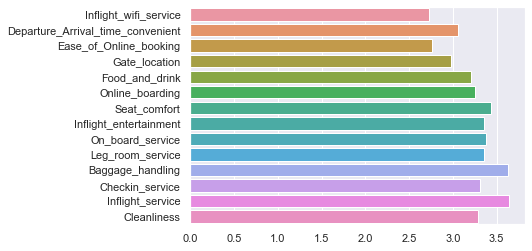

In [ ]:
sns.barplot(y=df.mean().index, x= df.mean().values)

<AxesSubplot:xlabel='Departure_Delay_in_Minutes', ylabel='Arrival_Delay_in_Minutes'>

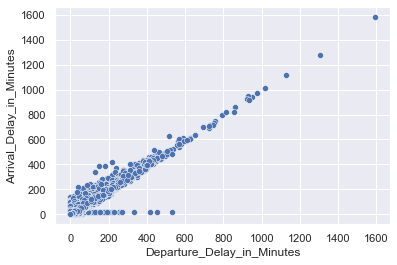

In [ ]:
l=sns.scatterplot(x='Departure_Delay_in_Minutes',y='Arrival_Delay_in_Minutes',data=data,palette='rainbow')
l

In [ ]:
Age_1 = []
for value in data['Age']:
    if value <= 14:
        Age_1.append('Child')
    elif value > 15 and value <= 24:
        Age_1.append('Youth')
    elif value > 25 and value <= 64:
        Age_1.append('Adult')
    else:
        Age_1.append('Seniors')


In [ ]:
Age_1=pd.DataFrame({'Age_1':Age_1})
Age_1


,Age_1
0,Adult
1,Adult
2,Youth
3,Adult
4,Adult
...,...
129875,Youth
129876,Adult
129877,Adult
129878,Youth


In [ ]:
data = data.assign(Age_1=Age_1)
data

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Flight_Distance1,Age_1
0,19556,1,1,52,1,-1,160,5,4,3,...,5,5,2,5,5,50,44.0,1,V_S_H,Adult
1,90035,1,1,36,1,0,2863,1,1,3,...,4,4,3,4,5,0,0.0,1,M_H_F,Adult
2,12360,0,0,20,1,-1,192,2,0,2,...,1,3,2,2,2,0,0.0,0,V_S_H,Youth
3,77959,0,1,44,1,0,3377,0,0,0,...,1,1,3,1,4,0,6.0,1,M_H_F,Adult
4,36875,1,1,49,1,-1,1182,2,3,4,...,2,2,4,2,4,0,20.0,1,S_H_F,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,1,0,23,1,-1,192,2,1,2,...,1,4,2,3,2,3,0.0,0,V_S_H,Youth
129876,73097,0,1,49,1,0,2347,4,4,4,...,5,5,5,5,4,0,0.0,1,M_H_F,Adult
129877,68825,0,0,30,1,0,1995,1,1,1,...,2,4,5,5,4,7,14.0,0,M_H_F,Adult
129878,54173,1,0,22,1,-1,1000,1,1,1,...,5,1,5,4,1,0,0.0,0,S_H_F,Youth


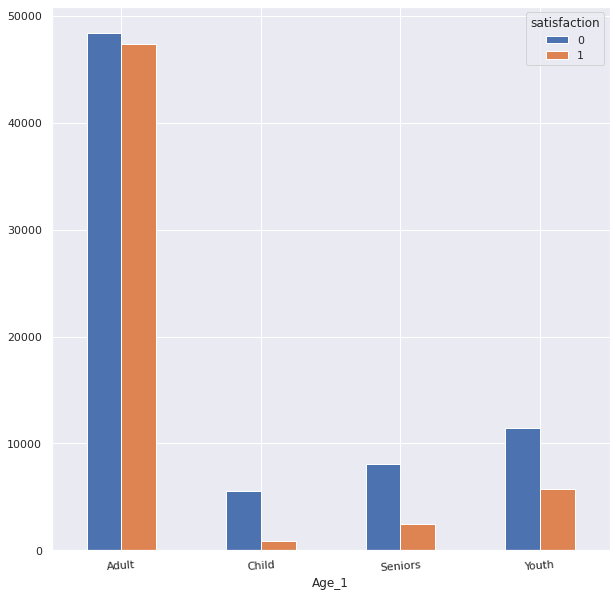

In [ ]:
CrosstabResult=pd.crosstab(index=data['Age_1'],columns=data['satisfaction'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4)

Text(0.5, 1.0, 'Age_1 vs satisfaction')

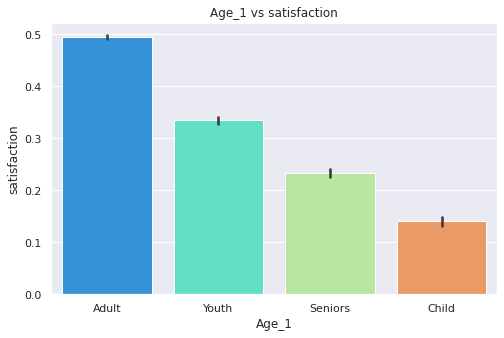

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age_1',y='satisfaction',data=data, palette='rainbow')
plt.title("Age_1 vs satisfaction")

<AxesSubplot:xlabel='Age_1'>

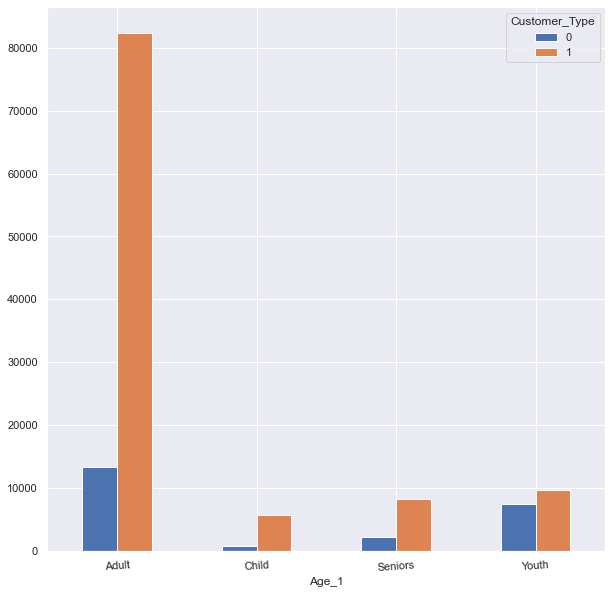

In [ ]:
CrosstabResult=pd.crosstab(index=data['Age_1'],columns=data['Customer_Type'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4,)

Text(0.5, 1.0, 'Age_1 vs Customer_Type')

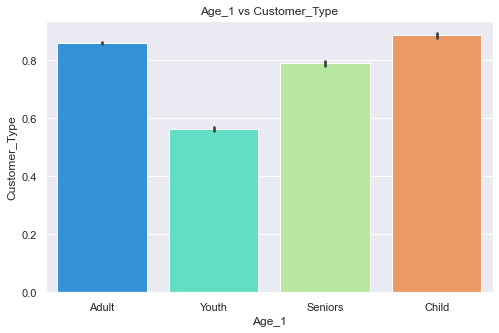

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age_1',y='Customer_Type',data=data, palette='rainbow')
plt.title("Age_1 vs Customer_Type")

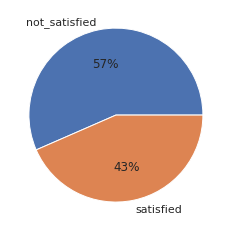

In [ ]:
lables=['not_satisfied','satisfied']
var=data.groupby('satisfaction')['satisfaction'].count()
plt.pie(var,labels=lables,autopct='%.0f%%')
plt.show()

In [ ]:
plot

<AxesSubplot:ylabel='satisfaction'>

<AxesSubplot:xlabel='Customer_Type'>

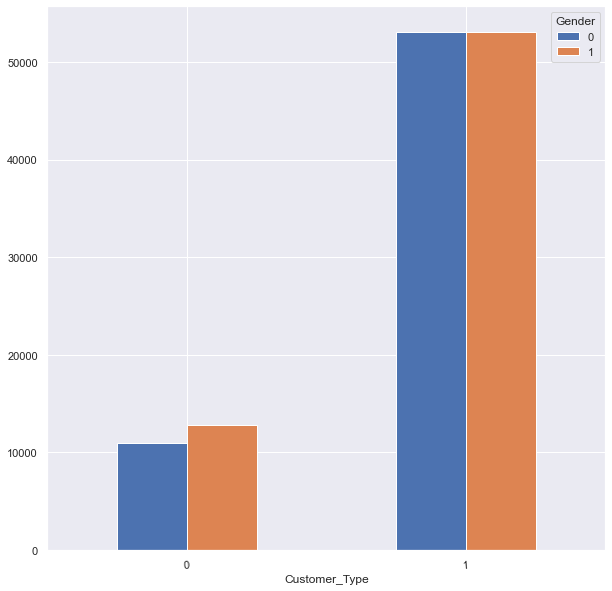

In [ ]:
CrosstabResult=pd.crosstab(index=data['Customer_Type'],columns=data['Gender'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4)

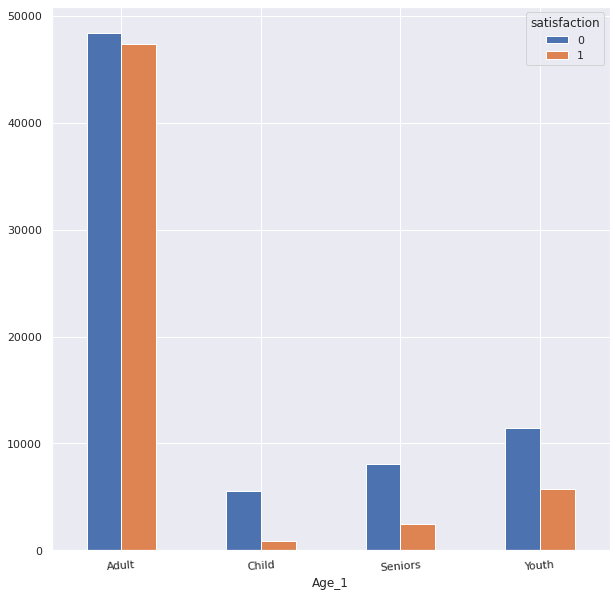

In [ ]:
CrosstabResult=pd.crosstab(index=data['Age_1'],columns=data['satisfaction'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4)#replace this with loyality of customer

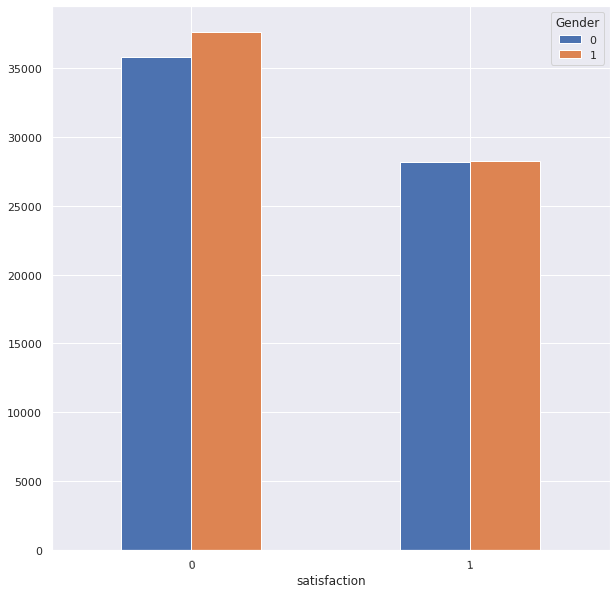

In [ ]:
CrosstabResult=pd.crosstab(index=data['satisfaction'],columns=data['Gender'])
CrosstabResult.plot.bar(figsize=(10,10), rot=4)